In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.core.display import display, HTML
import os
%matplotlib inline

In [18]:
import missingno as msno

In [2]:
# Notebook Styling 
sns.set()
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.float_format',lambda x: '%.5f' % x)

# Problem Description

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

| Variable | Variable Description |
| --- | :--- |
| amount_tsh | Total static head (amount water available to waterpoint) |
| date_recorded | The date the row was entered |
| funder | Who funded the well |
| gps_height | Altitude of the well |
| installer | Organization that installed the well |
| longitude | GPS coordinate |
| latitude | GPS coordinate |
| wpt_name | Name of the waterpoint if there is one |
| num_private | <blank> |
| basin | Geographic water basin |
| subvillage | Geographic location |
| region | Geographic location |
| region_code | Geographic location (coded) |
| district_code | Geographic location (coded) |
| lga | Geographic location |
| ward | Geographic location |
| population | Population around the well |
| public_meeting | True/False |
| recorded_by | Group entering this row of data |
| scheme_management | Who operates the waterpoint |
| scheme_name | Who operates the waterpoint |
| permit | If the waterpoint is permitted |
| construction_year | Year the waterpoint was constructed |
| extraction_type | The kind of extraction the waterpoint uses |
| extraction_type_group | The kind of extraction the waterpoint uses |
| extraction_type_class | The kind of extraction the waterpoint uses |
| management | How the waterpoint is managed |
| management_group | How the waterpoint is managed |
| payment | What the water costs |
| payment_type | What the water costs |
| water_quality | The quality of the water |
| quality_group | The quality of the water |
| quantity | The quantity of water |
| quantity_group | The quantity of water |
| source | The source of the water |
| source_type | The source of the water |
| source_class | The source of the water |
| waterpoint_type | The kind of waterpoint |
| waterpoint_type_group | The kind of waterpoint |

In [22]:
CSV_PATH = os.path.join('data', 'water_pumps', 'training_vals.csv')
X_train = pd.read_csv(CSV_PATH, encoding='latin1', index_col='id', parse_dates=['date_recorded']) 
X_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.00000,2011-03-14,Roman,1390,Roman,34.93809,-9.85632,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.00000,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.14747,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.00000,2013-02-25,Lottery Club,686,World vision,37.46066,-3.82133,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.00000,2013-01-28,Unicef,263,UNICEF,38.48616,-11.15530,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.00000,2011-07-13,Action In A,0,Artisan,31.13085,-1.82536,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [16]:
# are all of the indices unique?
bool(len(X_train.index.unique()) == X_train.shape[0])

True

In [7]:
X_train.shape

(59400, 40)

In [9]:
CSV_PATH = os.path.join('data', 'water_pumps', 'training_labels.csv')
y_train = pd.read_csv(CSV_PATH, encoding='latin1', index_col='id') 
y_train.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [24]:
CSV_PATH = os.path.join('data', 'water_pumps', 'test_vals.csv')
X_test = pd.read_csv(CSV_PATH, encoding='latin1', index_col='id', parse_dates=['date_recorded']) 
X_test.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.00000,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.05970,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.00000,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.30921,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.00000,2013-02-01,NaN,1567,NaN,34.76786,-5.00434,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.00000,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.41867,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.00000,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.95041,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null datetime64[ns]
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-

## Missing Data

From the info() printout above, we see that a few of the features are missing some data, and from the plot of missing data below, we see that

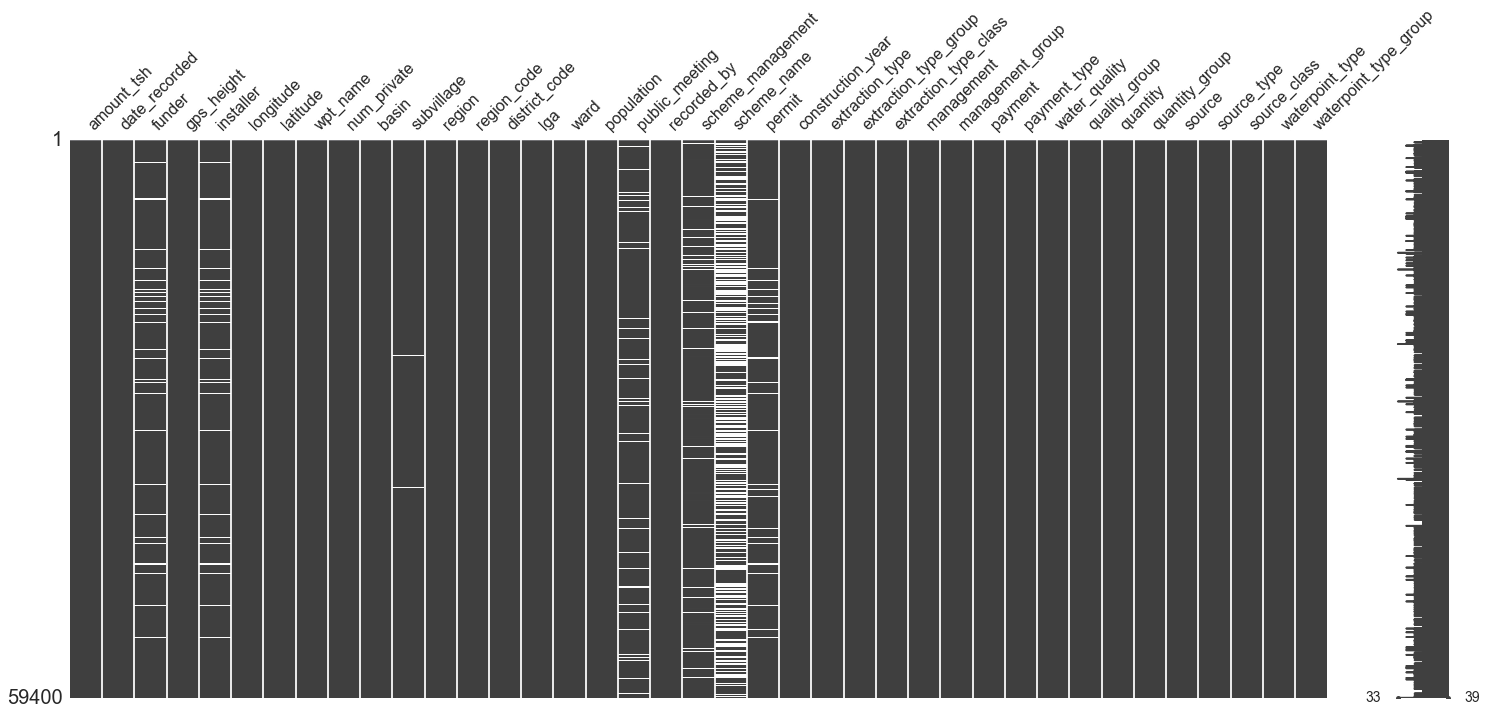

In [25]:
msno.matrix(X_train)

## Possible Categorical Features (features with the Object datatype)
Features with the Object datatype must be handled before we attempt to fit a model using the sklearn library. These features could be categorical features, or they could numerical features that require some preprocessing, or there could be some other issue. If features are actually categorical and contain new or important information, we'll have to convert them into dummy variables, and that could quickly cause the number of features to explode, which would promote overfitting. Let's take a look at the number of unique values for each feature.

In [70]:
for feat in X_train.columns:
    if X_train[feat].dtypes == object:
        print('Feat: {:>21s}, n_unique vals train: {:5d},  n_unique vals test: {:5d}'
              .format(feat, X_train[feat].nunique(), X_test[feat].nunique()))
        if X_train[feat].nunique() <= 21:
            if X_test[feat].nunique() != X_train[feat].nunique():
                print('X_test[feat].unique(): {}'.format(X_test[feat].unique()))
                print('X_train[feat].unique(): {}'.format(X_train[feat].unique()))
#         print('n_unique values in test but not train data: {:5d}'.format(np.intersect1d(X_train[feat].unique(), X_test[feat].unique())))
#         print('Feat: {}, number of unique vals: {}, unique vals: {}'.format(feat, X_train[feat].nunique(), X_train[feat].unique()))


Feat:                funder, n_unique vals train:  1897,  n_unique vals test:   980
Feat:             installer, n_unique vals train:  2145,  n_unique vals test:  1091
Feat:              wpt_name, n_unique vals train: 37400,  n_unique vals test: 10840
Feat:                 basin, n_unique vals train:     9,  n_unique vals test:     9
Feat:            subvillage, n_unique vals train: 19287,  n_unique vals test:  8443
Feat:                region, n_unique vals train:    21,  n_unique vals test:    21
Feat:                   lga, n_unique vals train:   125,  n_unique vals test:   125
Feat:                  ward, n_unique vals train:  2092,  n_unique vals test:  1959
Feat:        public_meeting, n_unique vals train:     2,  n_unique vals test:     2
Feat:           recorded_by, n_unique vals train:     1,  n_unique vals test:     1
Feat:     scheme_management, n_unique vals train:    12,  n_unique vals test:    11
X_test[feat].unique(): ['Parastatal' 'VWC' 'Water Board' nan 'Other' 'SWC' '

We quickly see some interesting things. Some features have thousands of unique values for both the training and testing data. Creating dummy variables for these features would cause the dimensionality of the data to explode, so we'll have to take a closer look at those.

Other features have a relatively small number of features (less than ~20 features), which may be reasonable candidates for retaining as categorical features. Creating dummy variables creates a column for each unique value for a given feature, but we see from things like 'scheme_management' or 'extraction_type' that the training and testing data have slightly different numbers of unique values. If the testing data categorical features that aren't in the training data, then the model we trained will have no . 



One feature has only 1 unique value (recorded_by) in both the training and testing data, and per the check below, the value is the same for both the testing and training data. As all of the values for this feature are the same, it's not providing any new information, so we can drop it.

In [49]:
print(X_train['recorded_by'].iloc[0])
X_train['recorded_by'].iloc[0] == X_test['recorded_by'].iloc[0]

GeoData Consultants Ltd


True

In [ ]:
drop_cols = ['recorded_by']

In [60]:
X_train_inds = X_train.index.values
X_test_inds = X_test.index.values
print('The set of indices in both the training and testing sets: {}'
      .format(np.intersect1d(X_train_inds, X_test_inds)))

The set of indices in both the training and testing sets: []


In [56]:
# X_train.loc[X_train_inds, :]

array([], dtype=int64)